# <font color='red'>SGD Algorithm to predict movie ratings</font>

**There will be some functions that start with the word "grader" ex: grader_matrix(), grader_mean(), grader_dim() etc, you should not change those function definition.<br><br>Every Grader function has to return True.**

<pre>
1. Download the data from <a href='https://drive.google.com/open?id=1-1z7iDB52cB6_JpO7Dqa-eOYSs-mivpq'> here </a>
2. The data will be of this format, each data point is represented as a triplet of user_id, movie_id and rating 
<table>
<tr><th>user_id</th><th>movie_id</th><th>rating</th></tr>
<tr><td>77</td><td>236</td><td>3</td></tr>
<tr><td>471</td><td>208</td><td>5</td></tr>
<tr><td>641</td><td>401</td><td>4</td></tr>
<tr><td>31</td><td>298</td><td>4</td></tr>
<tr><td>58</td><td>504</td><td>5</td></tr>
<tr><td>235</td><td>727</td><td>5</td></tr>
</table>

## <font color='red'>Task 1</font>

<font color='red'><b>Predict the rating for a given (user_id, movie_id) pair </b> </font>


Predicted rating $\hat{y}_{ij}$ for user i, movied j pair is calcuated as $\hat{y}_{ij} = \mu + b_i + c_j + u_i^T v_j$ , here we will be finding the best values of $b_{i}$ and $c_{j}$ using SGD algorithm with the optimization problem for N users and M movies is defined as

$$
L = \min_{ b, c, \{ u_i \}_{i=1}^N, \{ v_j \}_{j=1}^M}
\quad
\alpha \Big(
    \sum_{j} \sum_{k} v_{jk}^2 
    + \sum_{i} \sum_{k} u_{ik}^2 
    + \sum_{i} b_i^2
    + \sum_{j} c_i^2
    \Big)
+ \sum_{i,j \in \mathcal{I}^{\text{train}}}
    (y_{ij} - \mu - b_i - c_j - u_i^T v_j)^2
$$

<ul>
<li><span class="math">\(\mu\)</span> : scalar mean rating</li>
<li><span class="math">\(b_i\)</span> : scalar bias term for user <span class="math">\(i\)</span></li>
<li><span class="math">\(c_j\)</span> : scalar bias term for movie <span class="math">\(j\)</span></li>
<li><span class="math">\(u_i\)</span> : K-dimensional vector for user <span class="math">\(i\)</span></li>
<li><span class="math">\(v_j\)</span> : K-dimensional vector for movie <span class="math">\(j\)</span></li>
</ul>

 $ \ $





*.  We will be giving you some functions, please write code in that functions only.

*.  After every function, we will be giving you expected output, please make sure that you get that output. 





1. Construct adjacency matrix with the given data, assuming its graph and the weight of each edge is the rating given by user to the movie

<img src='https://i.imgur.com/rmUCGMb.jpg' width=200>

   you can construct this matrix like $A[i][j]=r_{ij}$ here $i$ is user_id, $j$ is movie_id and $r_{ij}$ is rating given by user $i$ to the movie $j$

   Hint : you can create adjacency matrix using <a href='https://docs.scipy.org/doc/scipy/reference/generated/scipy.sparse.csr_matrix.html'> csr_matrix</a>

2. We will Apply SVD decomposition on the Adjaceny matrix <a href='https://stackoverflow.com/a/31528944/4084039'>link1</a>, <a href='https://machinelearningmastery.com/singular-value-decomposition-for-machine-learning/'> link2</a> and get three matrices $U, \sum, V$ such that $U \times \sum \times V^T = A$, <br> 
if $A$ is of dimensions $N \times M$ then <br>
U is of $N \times k$, <br>
$\sum$ is of $k \times k$ and <br>
$V$ is $M \times k$ dimensions. <br>

   *.  So the matrix $U$ can be represented as matrix representation of users, where each row $u_{i}$ represents a k-dimensional vector for a user

   *. So the matrix $V$ can be represented as matrix representation of movies, where each row $v_{j}$ represents a k-dimensional vector for a movie.
3. Compute $\mu$ , $\mu$  represents the mean of all the rating given in the dataset.(write your code in <font color='blue'>def m_u()</font>)
4. For each unique user initilize a bias value $B_{i}$ to zero, so if we have $N$ users $B$ will be a $N$ dimensional vector, the $i^{th}$ value of the $B$ will corresponds to the bias term for $i^{th}$ user (write your code in <font color='blue'>def initialize()</font>)

5. For each unique movie initilize a bias value $C_{j}$ zero, so if we have $M$ movies $C$ will be a $M$ dimensional vector, the $j^{th}$ value of the $C$ will corresponds to the bias term for $j^{th}$ movie (write your code in <font color='blue'>def initialize()</font>)

6. Compute dL/db_i (Write you code in <font color='blue'> def derivative_db()</font>)
7. Compute dL/dc_j(write your code in <font color='blue'> def derivative_dc()</font>

8. Print the mean squared error with predicted ratings.

<pre>
for each epoch:
    for each pair of (user, movie):
        b_i =  b_i - learning_rate * dL/db_i
        c_j =  c_j - learning_rate * dL/dc_j
predict the ratings with formula
</pre>
$\hat{y}_{ij} = \mu + b_i + c_j + \text{dot_product}(u_i , v_j) $

9. you can choose any learning rate and regularization term in the range $10^{-3}  \text{ to } 10^2$  <br>
  
10. __bonus__: instead of using SVD decomposition you can learn the vectors $u_i$, $v_j$ with the help of SGD algo similar to $b_i$ and $c_j$ 

 # <font color='red'>Task 2 </font>

As we know U is the learned matrix of user vectors, with its i-th row as the vector ui for user i. Each row of U can be seen as a "feature vector" for a particular user.

The question we'd like to investigate is this: do our computed per-user features that are optimized for predicting movie ratings contain anything to do with gender?

The provided data file <a href='https://drive.google.com/open?id=1PHFdJh_4gIPiLH5Q4UErH8GK71hTrzlY'>user_info.csv</a> contains an is_male column indicating which users in the dataset are male. Can you predict this signal given the features U?


> __Note 1__ : there is no train test split in the data, the goal of this assignment is to give an intution about how to do matrix factorization with the help of SGD and application of truncated SVD. for better understanding of the collabarative fillerting please check netflix case study. <br><br>
> __Note 2__ : Check if scaling of $U$, $V$ matrices improve the metric 

<br>


<br>

<font color='red'> Reading the csv file </font>

In [1]:
import pandas as pd
data=pd.read_csv('ratings_train.csv')
data.head()

,user_id,item_id,rating
0,772,36,3
1,471,228,5
2,641,401,4
3,312,98,4
4,58,504,5


In [2]:
min(data['user_id'])

0

In [3]:
data.shape

(89992, 3)

<font color='red'>Create your adjacency matrix </font>

In [4]:
from scipy.sparse import csr_matrix
adjacency_matrix = csr_matrix((data['rating'], (data['user_id'], data['item_id'])))

In [5]:
adjacency_matrix.shape

(943, 1681)

<font color='cyan'>Grader function - 1</font>

In [6]:
def grader_matrix(matrix):
  assert(matrix.shape==(943,1681))
  return True
grader_matrix(adjacency_matrix)

True

**The unique items in the given csv file are 1662 only . But the id's vary from 0-1681 but they are not continuous and hence 
you'll get matrix of size 943x1681.**

<font color='red'> SVD decompostion</font>

Sample code for SVD decompostion

In [7]:
from sklearn.utils.extmath import randomized_svd
import numpy as np 
matrix = np.random.random((20, 10))
U, Sigma, VT = randomized_svd(matrix, n_components=5,n_iter=5, random_state=None)
print(U.shape)
print(Sigma.shape)
print(VT.T.shape)

(20, 5)
(5,)
(10, 5)


<font color='red'>Write your code for SVD decompostion</font>

In [8]:
# Please use adjacency_matrix as matrix for SVD decompostion
# You can choose n_components as your choice
from sklearn.utils.extmath import randomized_svd

U, Sigma, VT = randomized_svd(adjacency_matrix, 
                              n_components=150,
                              n_iter=500,
                              random_state=None)

<font color='red'>Compute mean of ratings</font>

In [9]:
def m_u(data):
  return data['rating'].mean()

<font color='cyan'>Grader function -2 </font>

In [10]:
def grader_mean(mu):
  assert(np.round(mu,3)==3.529)
  return True
mu=m_u(data)
grader_mean(mu)

True

<font color='red'>Initialize $B_{i}$ and $C_{j}$

Hint : Number of rows of adjacent matrix corresponds to user dimensions($B_{i}$), number of columns of adjacent matrix corresponds to movie dimensions ($C_{j}$)

In [32]:
b=[]
c=[]
def initialize(b,c):
  b=np.zeros(adjacency_matrix.shape[0])
  c=np.zeros(adjacency_matrix.shape[1])
  return b,c
b,c=initialize(b,c)
print(b.shape,c.shape)

(943,) (1681,)


<font color='cyan'>Grader function -3 </font>

In [12]:
def grader_dim(b_i,c_j):
  assert(len(b_i)==943 and np.sum(b_i)==0)
  assert(len(c_j)==1681 and np.sum(c_j)==0)
  return True
grader_dim(b,c)

True

<font color='red'>Compute dL/db_i</font>

In [13]:
def derivative_db(user_id,item_id,rating,U,V,mu,alpha,b_i=np.zeros(adjacency_matrix.shape[0]),c_j=np.zeros(adjacency_matrix.shape[1])):
    '''In this function, we will compute dL/db_i'''
    loss =  (2*(alpha+1)*b_i[user_id]) - 2*(rating - mu - b_i[user_id] - c_j[item_id] - np.dot(U[user_id],V[:,item_id].T))
    return loss

<font color='cyan'>Grader function -4 </font>

In [14]:
def grader_db(value):
    assert(np.round(value,3)==-0.931)
    return True
U1, Sigma, V1 = randomized_svd(adjacency_matrix, n_components=2,n_iter=5, random_state=24)
# Please don't change random state
# Here we are considering n_componets = 2 for our convinence
alpha=0.01 
mu=m_u(data)
value=derivative_db(312,98,4,U1,V1,mu,alpha)
grader_db(value)

True

<font color='red'>Compute dL/dc_j</font>

In [15]:
def derivative_dc(user_id,item_id,rating,U,V,mu,alpha,b_i=np.zeros(adjacency_matrix.shape[0]),c_j=np.zeros(adjacency_matrix.shape[1])):
    '''In this function, we will compute dL/dc_j'''
    loss =  (2*(alpha+1)*c_j[item_id]) - 2*(rating - mu - b_i[user_id] - c_j[item_id] - np.dot(U[user_id],V[:,item_id].T))
    return loss  

<font color='cyan'>Grader function - 5 </font>

In [16]:
def grader_dc(value):
    assert(np.round(value,3)==-2.929)
    return True
U1, Sigma, V1 = randomized_svd(adjacency_matrix, n_components=2,n_iter=5, random_state=24)
# Please don't change random state
# Here we are considering n_componets = 2 for our convinence
r=0.01 
value=derivative_dc(58,504,5,U1,V1,mu,0.01)
grader_dc(value)

True

<font color='red'>Compute MSE (mean squared error) for predicted ratings</font>


for each epoch, print the MSE value

<pre>
for each epoch:

    for each pair of (user, movie):

        b_i =  b_i - learning_rate * dL/db_i

        c_j =  c_j - learning_rate * dL/dc_j

predict the ratings with formula
</pre>

$\hat{y}_{ij} = \mu + b_i + c_j + \text{dot_product}(u_i , v_j) $

In [17]:
from sklearn.metrics import mean_squared_error as mse
def get_prediction(b_i,c_j,mu,df=data):
    '''calculates net rmse'''
    y_true = []
    y_pred = []
    for user,movie,rate in df[['user_id','item_id','rating']].values:
        try:
            y_hat = mu + b_i[user] + c_j[movie] + np.dot(U[user],VT[:,movie].T)
        except:
            # handling cold start problem assigning global average for test users/movies not in training set
            y_hat = mu
        y_true.append(rate)
        y_pred.append(y_hat)
    return mse(y_true,y_pred) 

In [18]:
from tqdm import tqdm
def my_SGD(X, lr, alpha, u_mat, v_mat, epoch=30):
    mu = m_u(data)
    errors=[]
    for i in tqdm(range(epoch)):
        for user, movie, rating in zip(X.user_id.values, X.item_id.values, X.rating.values):
          b[user]=b[user] - lr * derivative_db(user,movie,rating,u_mat,v_mat,mu,alpha,b,c)
          c[movie]=c[movie] - lr * derivative_dc(user,movie,rating,u_mat,v_mat,mu,alpha,b,c)
        error=get_prediction(b,c,mu)
        errors.append(error)
        # print('epoch: {0}, mse: {1} '.format(i+1, error))  
    return errors

<font color='red'>Plot epoch number vs MSE </font>

* epoch number on X-axis
* MSE on Y-axis

100%|██████████| 30/30 [01:06<00:00,  2.23s/it]


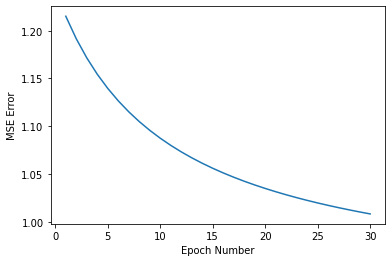

In [19]:
epoch=30
my_errors = my_SGD(data, 0.0001,0.0001, U, VT,epoch)
import numpy as np
import matplotlib.pyplot as plt
x = np.arange(1,epoch+1)
y = my_errors
plt.plot(x, y)
plt.xlabel("Epoch Number")
plt.ylabel("MSE Error")
plt.show()

In [20]:
min(my_errors)   #0.9318217355323781  1.008296586000108

1.0082470622551105

In [21]:
max(my_errors)

1.2150887920169118

In [22]:
my_errors[29]

1.0082470622551105

### Before Running the code run the code block for initialisation of b,c.

100%|██████████| 100/100 [03:56<00:00,  2.37s/it]


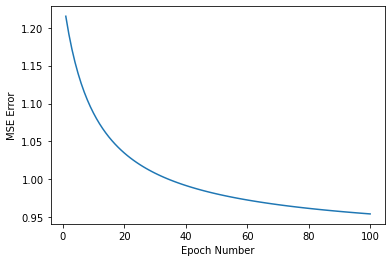

In [33]:
epoch=100
my_errors = my_SGD(data, 0.0001,0.0001, U, VT,epoch)
import numpy as np
import matplotlib.pyplot as plt
x = np.arange(1,epoch+1)
y = my_errors
plt.plot(x, y)
plt.xlabel("Epoch Number")
plt.ylabel("MSE Error")
plt.show()

In [34]:
min(my_errors) 

0.954482225173638

In [35]:
max(my_errors)

1.2150887920169118

In [36]:
my_errors[29]

1.0082470622551105

# Observation from the graph
#### First the b_i and c_j from random value reached to the value which provided minimum mse then due to constant changing of b_i and c_j the mse kept on increasing after reaching minima.



# <font color='red'> Task 2</font>

- For this task you have to consider the user_matrix U and the user_info.csv file.
- You have to consider is_male columns as  output features and rest as input features. Now you have to fit a model by posing this problem as binary classification task.
- You can apply any model like Logistic regression or Decision tree and check the performance of the model. 
- Do plot confusion matrix after fitting your model and write your observations how your model is performing in this task.

- Optional work- You can try scaling your U matrix.Scaling means changing the values of n_componenets while performing svd
  and then check your results.

In [23]:
data_male = pd.read_csv('user_info.csv')
data_male.head()

,user_id,age,is_male,orig_user_id
0,0,24,1,1
1,1,53,0,2
2,2,23,1,3
3,3,24,1,4
4,4,33,0,5


In [24]:
y_true = data_male.is_male.values

In [25]:
data_male['age']
l=list(data_male['age'])
l=np.array(l)
l=l.reshape(-1,1)

In [26]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()
X=np.hstack((U,l))
clf.fit(X, y_true)
y_pred = clf.predict(X)

In [27]:
from sklearn.metrics import roc_auc_score
acc = roc_auc_score(y_true, y_pred)
print('accuracy: {0}'.format(acc))

accuracy: 1.0


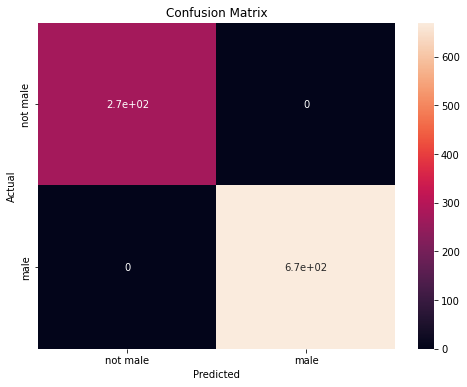

In [28]:
from sklearn.metrics import confusion_matrix
from matplotlib import pyplot as plt
import seaborn as sns

c_matrix= confusion_matrix(y_true, y_pred)

df_cm = pd.DataFrame(c_matrix, index = [i for i in ['not male', 'male']], 
                     columns = [i for i in ['not male', 'male']])
plt.figure(figsize = (8,6))
sns.heatmap(df_cm, annot=True)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Observation Decision Tree Model
### The model is highly accurate it is able to predict accurately male and non male members in the dataset in decision tree. I think this is because of deafault values of the hyperparameters i.e it can grow upto full depth and min_split is 2 only.

In [29]:
from sklearn.svm import SVC

clf = SVC(gamma='auto')
clf.fit(U, y_true)
y_pred = clf.predict(U)

In [30]:
from sklearn.metrics import roc_auc_score
acc = roc_auc_score(y_true, y_pred)
print('accuracy: {0}'.format(acc))

accuracy: 0.5


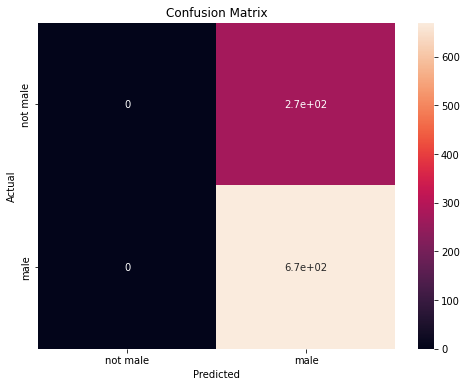

In [31]:
from sklearn.metrics import confusion_matrix
from matplotlib import pyplot as plt
import seaborn as sns

c_matrix= confusion_matrix(y_true, y_pred)

df_cm = pd.DataFrame(c_matrix, index = [i for i in ['not male', 'male']], 
                     columns = [i for i in ['not male', 'male']])
plt.figure(figsize = (8,6))
sns.heatmap(df_cm, annot=True)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Observation SVC Model
### From the above SVC model we see that the model is highly inaccurate as it is not able to predict no male user.
### There is no relation between U matrix and gender prediction.